In [14]:
# Import, one-hot-encode, PCA with 2 components, then 2d display
# Now with sparse matrix

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

# Load the dataset
file_path = './Resources/kidd_train.csv'
data = pd.read_csv(file_path, delimiter=',')


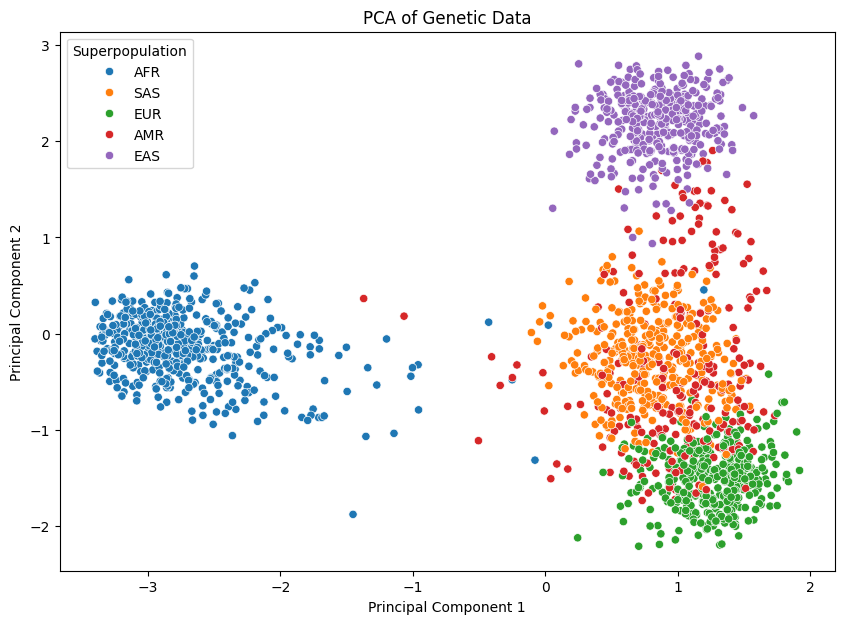

In [15]:

# Replace missing values with 'NN'
data_filled = data.fillna('NN')

# Define non-SNP columns by name
non_snp_columns = ['id', 'gender', 'superpopulation']

# Select SNP columns
snp_columns = [col for col in data.columns if col not in non_snp_columns]

# # Select SNP columns for encoding
# # Add logic to snip appropriate columns?
# snp_columns = data.columns[1:-2]  # assuming the last two columns are gender and superpopulation

# One-Hot Encode the SNP columns
X_encoded = pd.get_dummies(data_filled[snp_columns], drop_first=True)

# Convert to sparse matrix = this can be deleted if unneccessary 
sparse_matrix = csr_matrix(X_encoded.values)

# # Add the non-SNP columns back to the encoded DataFrame
# clean_data_encoded = pd.concat([data[['id', 'gender', 'superpopulation']], X_encoded], axis=1)

# # Drop non-numeric columns for PCA
# X_pca = clean_data_encoded.drop(columns=['id', 'gender', 'superpopulation'])

# Standardize the data
# scaler = StandardScaler(with_mean=False)
# X_scaled = scaler.fit_transform(sparse_matrix)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(sparse_matrix)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['superpopulation'] = data['superpopulation']

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='superpopulation', palette='tab10')
plt.title('PCA of Genetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Superpopulation')
plt.show()


In [16]:
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance for each component
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i} explains {ratio:.2%} of the variance.")

# Alternatively, you can use the cumulative explained variance to see how much variance is explained by the first n components
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
for i, ratio in enumerate(cumulative_explained_variance, start=1):
    print(f"First {i} components explain {ratio:.2%} of the variance.")

Principal Component 1 explains 14.83% of the variance.
Principal Component 2 explains 8.79% of the variance.

Cumulative Explained Variance:
First 1 components explain 14.83% of the variance.
First 2 components explain 23.63% of the variance.


In [17]:
# Approximate memory usage of the sparse matrix
import sys

# Memory usage of the sparse matrix
matrix_memory = sys.getsizeof(sparse_matrix.data) + sys.getsizeof(sparse_matrix.indices) + sys.getsizeof(sparse_matrix.indptr)
print(f"Approximate memory usage: {matrix_memory / 1e6} MB")

Approximate memory usage: 0.007852 MB


In [18]:
# Check memory usage of each column
memory_usage = X_encoded.memory_usage(deep=True)
print(memory_usage)

# Total memory usage of the DataFrame
total_memory_usage = memory_usage.sum()
print(f"Total memory usage: {total_memory_usage / 1e6} MB")

Index            128
rs3737576_CT    1878
rs3737576_TC    1878
rs3737576_TT    1878
rs7554936_CT    1878
                ... 
rs310644_TC     1878
rs310644_TT     1878
rs2024566_AG    1878
rs2024566_GA    1878
rs2024566_GG    1878
Length: 166, dtype: int64
Total memory usage: 0.309998 MB


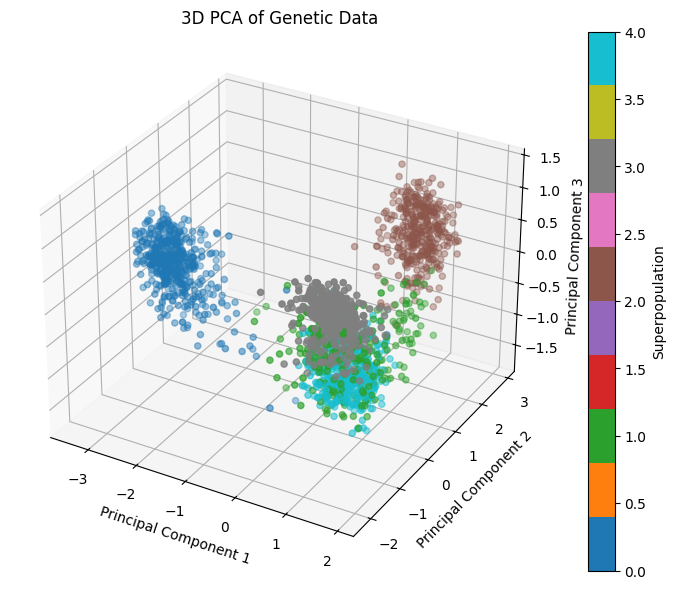

In [19]:
# Create a new PCA with 3 components, then 3d plot

# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 3 PCA components
num_components = 3
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(sparse_matrix)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])
pca_df['superpopulation'] = data['superpopulation']

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['superpopulation'].astype('category').cat.codes, cmap='tab10')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Genetic Data')
plt.colorbar(sc, label='Superpopulation')
plt.show()

In [20]:
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance for each component
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i} explains {ratio:.2%} of the variance.")

# Alternatively, you can use the cumulative explained variance to see how much variance is explained by the first n components
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
for i, ratio in enumerate(cumulative_explained_variance, start=1):
    print(f"First {i} components explain {ratio:.2%} of the variance.")

Principal Component 1 explains 14.83% of the variance.
Principal Component 2 explains 8.79% of the variance.
Principal Component 3 explains 2.07% of the variance.

Cumulative Explained Variance:
First 1 components explain 14.83% of the variance.
First 2 components explain 23.63% of the variance.
First 3 components explain 25.70% of the variance.


In [21]:
# Seldin data set
# Load the dataset
file_path = './Resources/seldin_combined.csv'
data = pd.read_csv(file_path, delimiter=',')


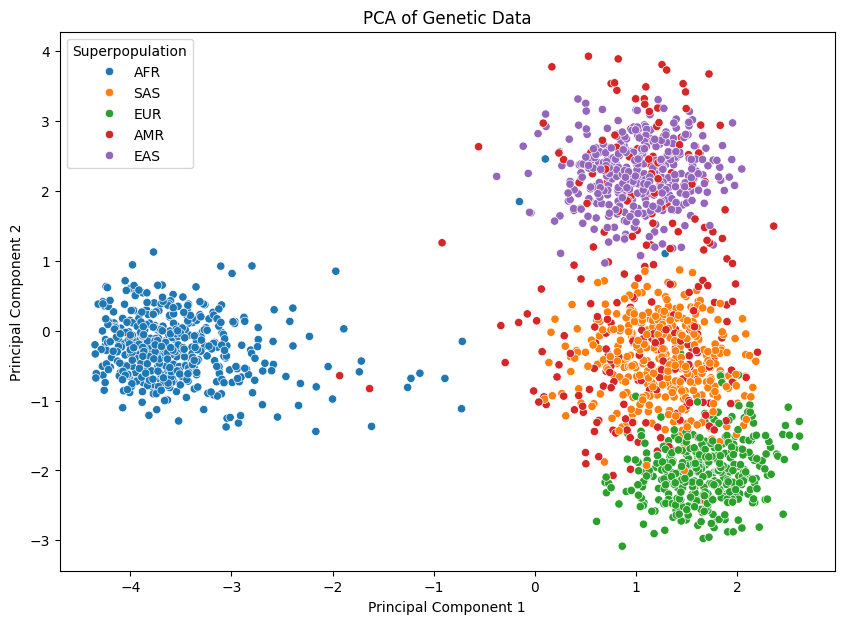

In [22]:
# Replace missing values with 'NN'
data_filled = data.fillna('NN')

# Define non-SNP columns by name
non_snp_columns = ['id', 'gender', 'superpopulation']

# Select SNP columns
snp_columns = [col for col in data.columns if col not in non_snp_columns]

# # Select SNP columns for encoding
# # Add logic to snip appropriate columns?
# snp_columns = data.columns[1:-2]  # assuming the last two columns are gender and superpopulation

# One-Hot Encode the SNP columns
X_encoded = pd.get_dummies(data_filled[snp_columns], drop_first=True)

# Convert to sparse matrix = this can be deleted if unneccessary 
sparse_matrix = csr_matrix(X_encoded.values)

# # Add the non-SNP columns back to the encoded DataFrame
# clean_data_encoded = pd.concat([data[['id', 'gender', 'superpopulation']], X_encoded], axis=1)

# # Drop non-numeric columns for PCA
# X_pca = clean_data_encoded.drop(columns=['id', 'gender', 'superpopulation'])

# # Standardize the data
# scaler = StandardScaler(with_mean=False)
# X_scaled = scaler.fit_transform(sparse_matrix)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(sparse_matrix)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['superpopulation'] = data['superpopulation']

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='superpopulation', palette='tab10')
plt.title('PCA of Genetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Superpopulation')
plt.show()


In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance for each component
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i} explains {ratio:.2%} of the variance.")

# Alternatively, you can use the cumulative explained variance to see how much variance is explained by the first n components
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
for i, ratio in enumerate(cumulative_explained_variance, start=1):
    print(f"First {i} components explain {ratio:.2%} of the variance.")

Principal Component 1 explains 8.20% of the variance.
Principal Component 2 explains 4.23% of the variance.

Cumulative Explained Variance:
First 1 components explain 8.20% of the variance.
First 2 components explain 12.43% of the variance.


c:\Users\markp\anaconda3\envs\dev\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


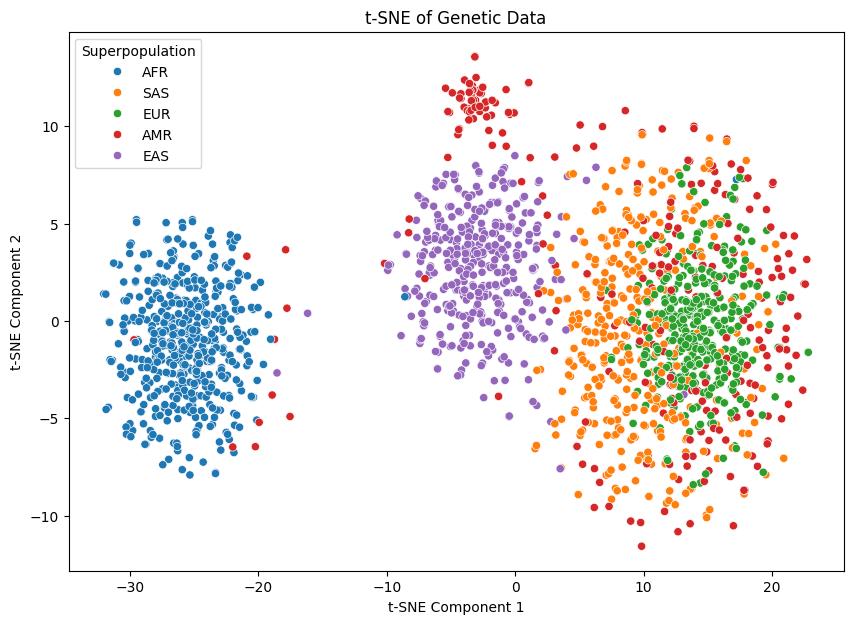

In [24]:
# t-SNE time!

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(X_encoded)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['superpopulation'] = data['superpopulation']

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='superpopulation', palette='tab10')
plt.title('t-SNE of Genetic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Superpopulation')
plt.show()

In [25]:

# Chunker for later?

import pandas as pd
def one_hot_encode_chunk(chunk, categorical_columns):
    return pd.get_dummies(chunk, columns=categorical_columns)
# Define the path to the large dataset
file_path = 'example.csv'
# Specify the columns to be one-hot encoded
categorical_columns = ['category1', 'category2', 'category3']
# Define the chunk size
chunk_size = 10000
# Initialize an empty list to store processed chunks
processed_chunks = []
# Read and process the data in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # One-hot encode the categorical columns in the chunk
    encoded_chunk = one_hot_encode_chunk(chunk, categorical_columns)
# Concatenate all processed chunks into a single DataFrame
processed_data = pd.concat(processed_chunks, axis=0)
# Save the processed data to a new CSV file
processed_data.to_csv('processed_large_dataset.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'example.csv'